In [1]:
#Importar pandas
import pandas as pd 
import matplotlib.pyplot as plt 
import tbcontrol
import control
import numpy as np
tbcontrol.expectversion("0.1.10")
%matplotlib inline
import scipy.optimize
from tbcontrol.responses import fopdt, sopdt
from ipywidgets import interact


# Ejercicio de identificación de sistemas

# 1.	Explore la tabla y describa su contenido.




El contenido de la table son datos de el tiempo, temperatura y el step que es la señal de entrada

# 2.	Usando el módulo pandas, lea el contenido de la tabla.



In [2]:
a0 = pd.read_csv('C:\\Users\\jgall\\OneDrive\\Documentos\\ControlAnalogo\\DatosJS.csv')
a = a0 [a0['Tiempo'] > 19 ] 
a

,Tiempo,Entrada,Salida
39,19.5,20,6.785451
40,20.0,80,6.755044
41,20.5,80,6.724637
42,21.0,80,7.552863
43,21.5,80,9.080447
...,...,...,...
116,58.0,80,23.034315
117,58.5,80,23.037210
118,59.0,80,23.040106
119,59.5,80,23.044450


# 3.	Genere y analice las gráficas correspondientes a las señales de entrada y salida.

In [3]:
time = a["Tiempo"]-20
salida = a["Salida"]
escalon = a["Entrada"]-20


Text(0, 0.5, 'caudal')

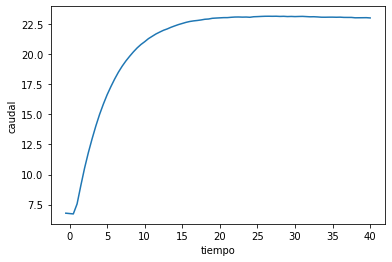

In [4]:
plt.plot(time,salida)
plt.xlabel("tiempo")
plt.ylabel("caudal")

Text(0, 0.5, 'escalon')

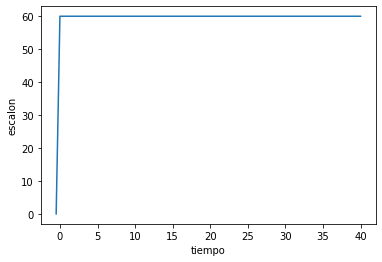

In [5]:
plt.plot(time,escalon)
plt.xlabel("tiempo")
plt.ylabel("escalon")

Con la gráfica de la señal de entrada vemos que es de tipo escalón esta permite conocer la respuesta del sistema frente a cambios abruptos en su entrada.

Con la grafica de la salida podemos observar que el sistema es estable de primer orden.


# 4.	 Encuentre un modelo para el sistema explicando el procedimiento.

Ajuste a un modelo de prtimer orden 

Se encuentra un modelo de primer orden de la forma:

\begin{equation}
G(s) = \frac{K}{\tau s + 1} \cdot e^{-s\theta}
\end{equation}

In [6]:

fopdt
ts=np.linspace(0,100,1000)

In [7]:
def resultplot1(K, tau, theta, y0):
    plt.figure(figsize=(20, 7))
    plt.scatter(time,salida)
    plt.plot(ts, fopdt(ts, K, tau, theta, y0), color='yellow')
    plt.grid(True)


In [8]:
interact(resultplot1, 
         K=(0., 100.), 
         tau=(0., 100.), 
         theta=(0., 100.), 
         y0=(0., 20.));

interactive(children=(FloatSlider(value=50.0, description='K'), FloatSlider(value=50.0, description='tau'), Fl…

Luego de encontrar el modelo de primer orden, se procede hallando los valores de k (ganancia), tau (constante de tiempo) y teta (retardo), de una forma experimental cambiando sus valores hasta que su grafica coincida con la grafica del sistema. 

# 5.	Genere y analice las gráficas de polos y ceros y de respuesta temporal del sistema.

In [30]:
k=16.4
tau=4.70
theta=1.10
y0=6.60


In [31]:
[K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, time, salida, [k, tau, theta, y0])
[K, tau, theta, y0]

[16.420654994945593, 4.489013570371075, 0.8276042860136892, 6.755043983167655]

In [32]:
Y_1orden = fopdt(time, k, tau, theta, y0)

In [33]:
p2_inicial = [2, 0.6, 2, 0.5, 10]
[K_2, tau_2, zeta_2, theta_2, y0_2], pcov = scipy.optimize.curve_fit(sopdt, time, salida, p2_inicial)
[K_2, tau_2, zeta_2, theta_2, y0_2]

C:\ProgramData\Anaconda3\lib\site-packages\tbcontrol\responses.py:51: RuntimeWarning: invalid value encountered in sqrt
  root = numpy.sqrt(1 - zeta**2)


[16.41649780301418,
 1.373172481821343,
 1.764990327501298,
 0.4444917809150521,
 6.749541559927515]

In [34]:
perr = np.sqrt(np.diag(pcov))
perr

array([0.04105713, 0.09261539, 0.10322354, 0.05515413, 0.0400832 ])

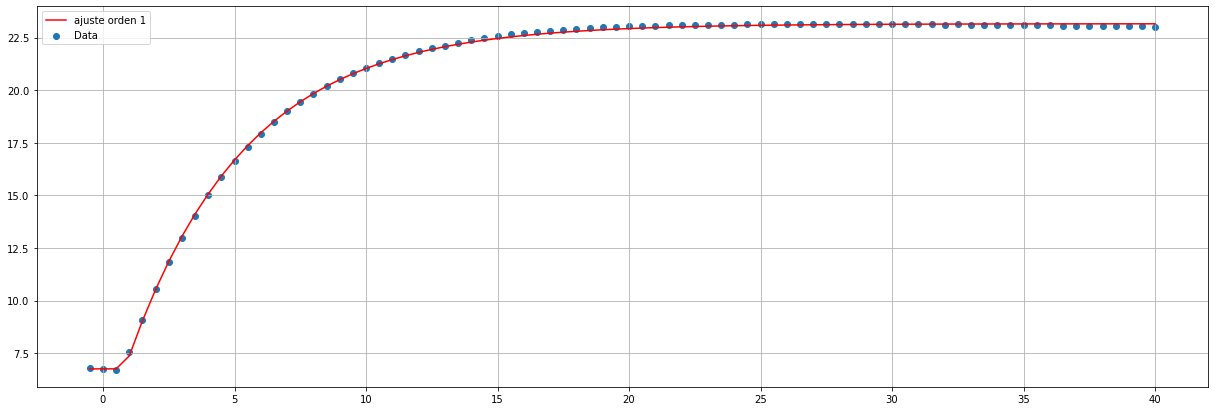

In [35]:
plt.figure(figsize=(21, 7))
plt.scatter(time, salida, label='Data')
plt.plot(time, Y_1orden, color='red', label='ajuste orden 1')
plt.legend(loc='best')
plt.grid(True)

In [36]:
# Se define la función de transferencia del proceso
Gp = control.tf([k], [tau, 1])
Gp

TransferFunction(array([16.4]), array([4.48901357, 1.        ]))

In [37]:
# Se hallan los polos del proceso
polos = Gp.pole()
polos

array([-0.22276609])

In [38]:
# Se hallan los ceros del proceso
ceros = Gp.zero()
ceros

array([], dtype=float64)

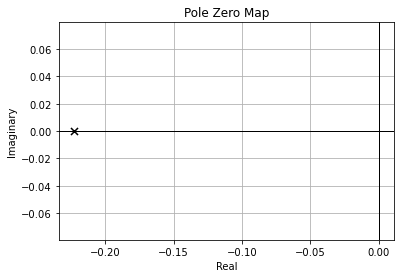

In [39]:
# Se grafica el mapa de polos y ceros
control.pzmap(Gp)
plt.grid(True)

El sistema tiene un polo en -0.2 y no tiene ceros, entonces entre mas alejado a la izquierda este el polo sobre el eje real más rápido la respuesta transitoria exponencial decaerá a cero.

# Conclusiones 

Con los datos mostrados anteriormente se identificó que los sistemas persiguen la obtención de modelos matemáticos de sistemas dinámicos a partir de mediciones realizadas en el proceso: entradas o variables de control, salidas o variables controladas.

Utilizando los conceptos aprendidos en clase se pudo analizar la toma de datos de un sistema, graficando las señales de entra y salida se definió el modelo del sistema, dándole valores a la función de transferencia de primer orden de forma experimental y graficando los polos y ceros del sistema se evidencia que el sistema excitado por una entrada escalón es estable.
